In [1]:
# Modules
import numpy as np
import xarray as xr
import pandas as pd

from data import data_loader
from data import gesla_preprocessing
from data import era5_preprocessing
from data import preprocessing

Load Predictand from GESLA
Applied one-hot-encoding with Percentile: 0.99
Get overlapping timeseries of ERA5 and GESLA
X: (903, 121, 141)
Y: (903, 1)
t: (903,)
(903, 17061)
(903,)
Tested Hyperparameters: {'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True]}
Optimize Hyperparameters using RandomSearchCV
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Evaluate Model 

test_score: 0.9557522123893806
train_score: 1.0
importances: [0.00000000e+00 1.28139761e-18 0.00000000e+00 ... 8.31944856e-04
 3.24473726e-04 2.49764356e-04]
saved importances to : results/random_forest/rf003/importances_tp99
Show Confusion Matrix 



D:\OneDrive\Alle_Ordner\Coding\Python\master_thesis\models\random_forest\rf003.py:248: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  cfm_fig.show()


saved cf matrix to : results/random_forest/rf003/cf_matrix_tp99.jpg


d:\OneDrive\Alle_Ordner\Coding\Python\master_thesis\models\evaluation.py:146: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = tp / (tp + fp)


Metric values 

tnr: 1.0
tpr: 0.0
gmean: 0.0
wacc: 0.5
precision: nan
recall: 0.0
fmeasure: nan
saved cf metrics to : cf_metrics_tp99.pkl
Show AUROC 

AUC: 0.8578703703703704
saved AUROC to : results/random_forest/rf003/AUROC_tp99.jpg
Load ERA5-Predictor: tp in region: lon-0530_lat7040 for years: 1999-2008 in season: winter


D:\OneDrive\Alle_Ordner\Coding\Python\master_thesis\models\random_forest\rf003.py:287: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Load Predictand from GESLA
Applied one-hot-encoding with Percentile: 0.99
Get overlapping timeseries of ERA5 and GESLA
X: (903, 121, 141)
Y: (903, 1)
t: (903,)
(903, 17061)
(903,)
Tested Hyperparameters: {'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True]}
Optimize Hyperparameters using RandomSearchCV
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Evaluate Model 

test_score: 0.9557522123893806
train_score: 1.0
importances: [0.00025623 0.00076794 0.00025806 ... 0.00012697 0.00010531 0.00019471]
saved importances to : results/random_forest/rf003/importances_v1099
Show Confusion Matrix 



D:\OneDrive\Alle_Ordner\Coding\Python\master_thesis\models\random_forest\rf003.py:248: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  cfm_fig.show()


saved cf matrix to : results/random_forest/rf003/cf_matrix_v1099.jpg


d:\OneDrive\Alle_Ordner\Coding\Python\master_thesis\models\evaluation.py:146: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = tp / (tp + fp)


Metric values 

tnr: 1.0
tpr: 0.0
gmean: 0.0
wacc: 0.5
precision: nan
recall: 0.0
fmeasure: nan
saved cf metrics to : cf_metrics_v1099.pkl
Show AUROC 

AUC: 0.8490740740740741
saved AUROC to : results/random_forest/rf003/AUROC_v1099.jpg
Load ERA5-Predictor: v10 in region: lon-0530_lat7040 for years: 1999-2008 in season: winter


D:\OneDrive\Alle_Ordner\Coding\Python\master_thesis\models\random_forest\rf003.py:287: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


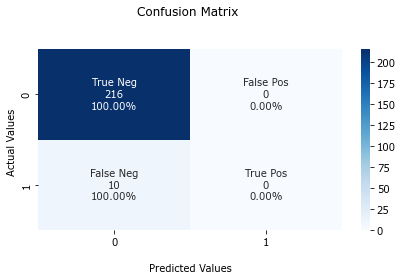

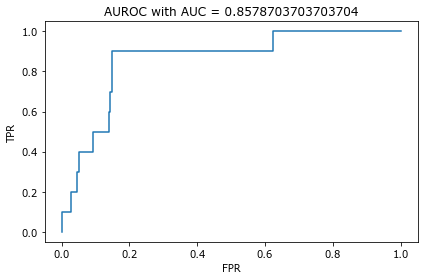

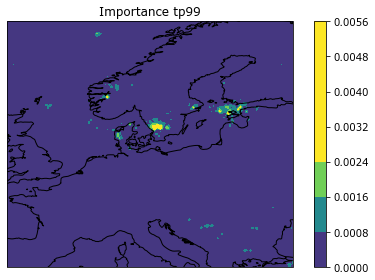

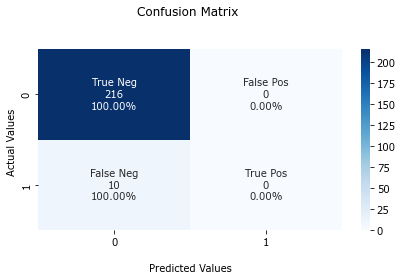

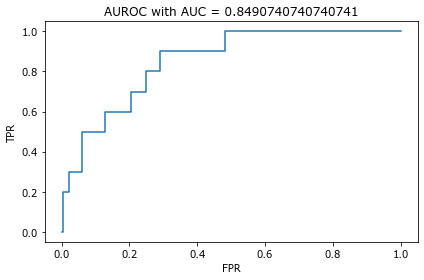

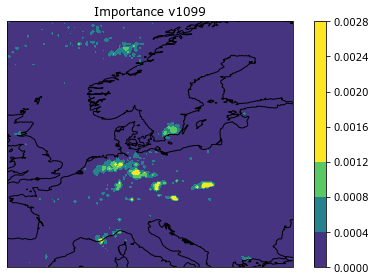

In [2]:
%run models/random_forest/rf003.py

In [ ]:

# ---
# Preprocessing
# ---

# Get timeseries of predictor and predictand
season = "winter" # ["winter", "autumn",] 
predictor = "sp" # ["sp", "tp", "u10", "v10",]
percentile = 0.95 # [0.95, 0.99,] 
era5_import = "preprocess1" # ["preprocess1"]
range_of_years = "1999-2008" # ["1999-2008", "2009-2018", "2019-2022",]
subregion = "lon-0530_lat7040" # ["lon-0530_lat7040"]
station_names = ["hanko-han-fin-cmems",]

X, Y, t = preprocessing.preprocess(season,
predictor,
percentile,
era5_import,
range_of_years,
subregion,
station_names,
)

lats, lons = preprocessing.get_lonlats(range_of_years, subregion, season, predictor, era5_import)

print(f"X: {X.shape}")
print(f"Y: {Y.shape}")
print(f"t: {t.shape}")
print(f"lats: {lats.shape}")
print(f"lons: {lons.shape}")

In [13]:
#---
# Preprocessing
#--- 

# Handle NaN values: 
# Insert numerical value that is not in data.
# ML will hopefully recognize it.
X[np.where(np.isnan(X))] = -999

# Save number of lat/lon for interpreting model output later
ndim = X.shape[0]
nlat = X.shape[1]
nlon = X.shape[2]
nclasses = nlat * nlon

# Prepare shape for model
X = X.reshape(ndim, nclasses) # (ndim, nclasses)
y = Y[:, 0] # Select only one station

print(X.shape)
print(y.shape)

(903, 17061)
(903,)


In [ ]:
#--- 
# Train Model
#---


In [ ]:
#---
# Model-runs / Test-runs to create results
#---

# Random Forests
#---
from models.random_forest import rf001
from models.random_forest import rf002

predictors = ["sp", "tp", "u10", "v10",]
percentiles = [0.95, 0.99]

for percentile in percentiles:
    rf001.run(predictor="sp", percentile=percentile) # Only adjusted for SP

for percentile in percentiles:
    for predictor in predictors:
        rf002.run(predictor, percentile)

Load importance of model run: rf002
Get longitudes and latitudes of preprocess: preprocess1
Load ERA5-Predictor: sp in region: lon-0530_lat7040 for years: 1999-2008 in season: winter
Plot importance map
Load importance of model run: rf002
Get longitudes and latitudes of preprocess: preprocess1
Load ERA5-Predictor: sp in region: lon-0530_lat7040 for years: 1999-2008 in season: winter
Plot importance map


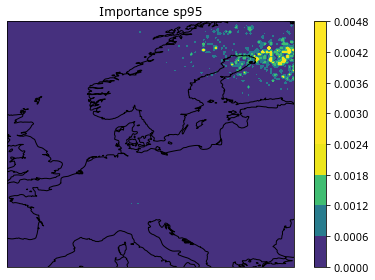

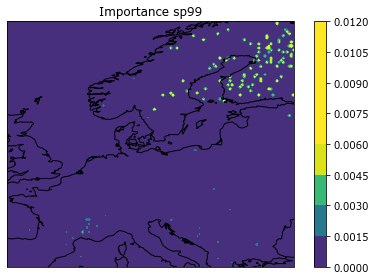

In [ ]:
#---
# Visualization
#---

# Metric: Importance
#---
from data import preprocessing
import numpy as np

# Initialize
model_run = "rf002"
predictors = ["sp", "tp", "u10", "v10",]
percentiles = [0.95, 0.99]
range_of_years = "1999-2008"
subregion = "lon-0530_lat7040"
season = "winter"
preprocess = "preprocess1"

for predictor in predictors[:1]:
    for percentile in percentiles:
        # Load importance of model run
        print(f"Load importance of model run: {model_run}")

        folder = f"results/random_forest/{model_run}/{predictor}/"
        fname = f"importances_{predictor}{str(percentile)[-2:]}"
        importance = np.load(f"{folder}{fname}.npy")

        # Load lat lons
        print(f"Get longitudes and latitudes of preprocess: {preprocess}")
        lats, lons = preprocessing.get_lonlats(
            range_of_years,
            subregion,
            season,
            predictor,
            preprocess,
        )

        # Plot importance-map
        print(f"Plot importance map")
        from models import evaluation
        tflag = f"{predictor}{str(percentile)[-2:]}"
        fig = evaluation.importance_map(importance, lons, lats, tflag=tflag)

        # # Save importance-map
        # folder = f"results/random_forest/rf002/{predictor}/"
        # fname = f"importance_map_{predictor}{str(percentile)[-2:]}"
        # fig.savefig(f"{folder}{fname}.jpg")

In [3]:
# Forecast

In [ ]:
# Postprocessing

In [ ]:
# Diagnostics